# Exploratory Data Analysis

In [38]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [2]:
# loading scripts
from manager import Manager
man = Manager()

In [3]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7fce08eebe50; closed: 0>


In [8]:
# fetching data
data = man.fetch_data(conn=connection, limit=10000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,delivery_requirements,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_cost_or_budget,agency_fee,percentages,flat_fee,net_cost
0,yiiwsb9,impression,300,250,rplsdsrv,088383b7-0bd3-479f-bf78-2373dccf484b,2021-04-28T22:19:35.365Z,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.onlyinyourstate.com,...,None,USA,USD,0.33,151515.15,50000,Percentage,0,None,50000
1,yiiwsb9,impression,300,250,rplsdsrv,dab396b3-5245-4e94-9442-c2bdd5fb6043,2021-04-28T22:19:35.371Z,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,detoxinista.com,...,None,USA,USD,0.33,151515.15,50000,Percentage,0,None,50000
2,yiiwsb9,impression,300,250,rplsdsrv,9f05507a-6bc0-4c16-ae4c-4aafc8d3c101,2021-04-28T22:19:35.470Z,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,detoxinista.com,...,None,USA,USD,0.33,151515.15,50000,Percentage,0,None,50000
3,yiiwsb9,impression,300,250,rplsdsrv,6e03fa65-1851-4655-9d9d-ebfa6a895feb,2021-04-28T22:19:35.622Z,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.basketball-reference.com,...,None,USA,USD,0.33,151515.15,50000,Percentage,0,None,50000
4,yiiwsb9,impression,300,250,rplsdsrv,545779fc-12ad-4a06-92f4-5888ac22c67d,2021-04-28T22:19:35.790Z,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.namesakecomic.com,...,None,USA,USD,0.33,151515.15,50000,Percentage,0,None,50000


In [10]:
# checking data
print(data.shape)
data.info()

(10000, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   campaign_id            10000 non-null  object
 1   types                  10000 non-null  object
 2   width                  10000 non-null  object
 3   height                 10000 non-null  object
 4   creative_id            10000 non-null  object
 5   auction_id             10000 non-null  object
 6   browser_ts             10000 non-null  object
 7   game_key               10000 non-null  object
 8   geo_country            10000 non-null  object
 9   site_name              10000 non-null  object
 10  platform_os            10000 non-null  object
 11  device_type            10000 non-null  object
 12  browser                10000 non-null  object
 13  campaign_name          10000 non-null  object
 14  submission_date        10000 non-null  object
 15  descript

In [11]:
# checking variables
data.columns

Index(['campaign_id', 'types', 'width', 'height', 'creative_id', 'auction_id',
       'browser_ts', 'game_key', 'geo_country', 'site_name', 'platform_os',
       'device_type', 'browser', 'campaign_name', 'submission_date',
       'descriptions', 'campaign_objectives', 'kpis', 'placement', 'startdate',
       'enddate', 'serving_location', 'black_white_audience',
       'delivery_requirements', 'cost_centre', 'currency', 'buy_rate_cpe',
       'volume_agreed', 'gross_cost_or_budget', 'agency_fee', 'percentages',
       'flat_fee', 'net_cost'],
      dtype='object')

## Uni-Variate Analysis

In [23]:
# selecting some columns

selection1 = data[["campaign_id", "types", "geo_country", "platform_os", "device_type", "browser", "submission_date", "serving_location", "gross_cost_or_budget"]]
print(selection1.info())
selection1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   campaign_id           10000 non-null  object
 1   types                 10000 non-null  object
 2   geo_country           10000 non-null  object
 3   platform_os           10000 non-null  object
 4   device_type           10000 non-null  object
 5   browser               10000 non-null  object
 6   submission_date       10000 non-null  object
 7   serving_location      10000 non-null  object
 8   gross_cost_or_budget  6162 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB
None


,campaign_id,types,geo_country,platform_os,device_type,browser,submission_date,serving_location,gross_cost_or_budget
0,yiiwsb9,impression,United States,6,Mobile,Chrome Mobile WebView,21/04/2021 16:54,US National,50000
1,yiiwsb9,impression,United States,6,Mobile,Chrome Mobile,21/04/2021 16:54,US National,50000
2,yiiwsb9,impression,United States,6,Mobile,Chrome Mobile,21/04/2021 16:54,US National,50000
3,yiiwsb9,impression,United States,5,Mobile,Mobile Safari,21/04/2021 16:54,US National,50000
4,yiiwsb9,impression,United States,6,Mobile,Chrome Mobile,21/04/2021 16:54,US National,50000


In [43]:
# analyzing types
def find_agg(df, group_columns, agg_columns, agg_metrics, new_columns):
        """
        a function that returns a new dataframe with aggregate values of specified columns.
        """
        new_column_dict ={}
        agg_dict = {}
        for i in range(len(agg_columns)):
            new_column_dict[agg_columns[i]] = new_columns[i]
            agg_dict[agg_columns[i]] = agg_metrics[i]

        new_df = df.groupby(group_columns).agg(agg_dict).reset_index().rename(columns=new_column_dict)
        return new_df

def summ_columns(df, unique=True):
        """
        shows columns and their missing values along with data types.
        """
        df2 = df.isna().sum().to_frame().reset_index()
        df2.rename(columns = {'index':'variables', 0:'missing_count'}, inplace = True)
        df2['missing_percent_(%)'] = round(df2['missing_count']*100/df.shape[0])
        data_type_lis = df.dtypes.to_frame().reset_index()
        df2['data_type'] = data_type_lis.iloc[:,1]
        
        if(unique):
            unique_val = []
            for i in range(df2.shape[0]):
                unique_val.append(len(pd.unique(df[df2.iloc[i,0]])))
            df2['unique_values'] = pd.Series(unique_val)
        return df2

def bar_graph(df, cols, x_ax):
        """
        graphical univariate analysis function. bar chart.
        """
        plot_df = df[cols]
        plt.figure(figsize=(15, 10))
        sns.countplot(x= x_ax, data=plot_df)

In [50]:
summ_columns(selection1)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,4
1,types,0,0.0,object,3
2,geo_country,0,0.0,object,3
3,platform_os,0,0.0,object,4
4,device_type,0,0.0,object,2
5,browser,0,0.0,object,20
6,submission_date,0,0.0,object,4
7,serving_location,0,0.0,object,3
8,gross_cost_or_budget,3838,38.0,object,4


In [60]:
type_aggr = find_agg(selection1, ["types"], ["campaign_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False)
browser_aggr = find_agg(selection1, ["browser"], ["campaign_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False)
plat_aggr = find_agg(selection1, ["platform_os"], ["campaign_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False)
type_aggr

,types,counts
2,impression,8749
1,first_dropped,824
0,click-through-event,427


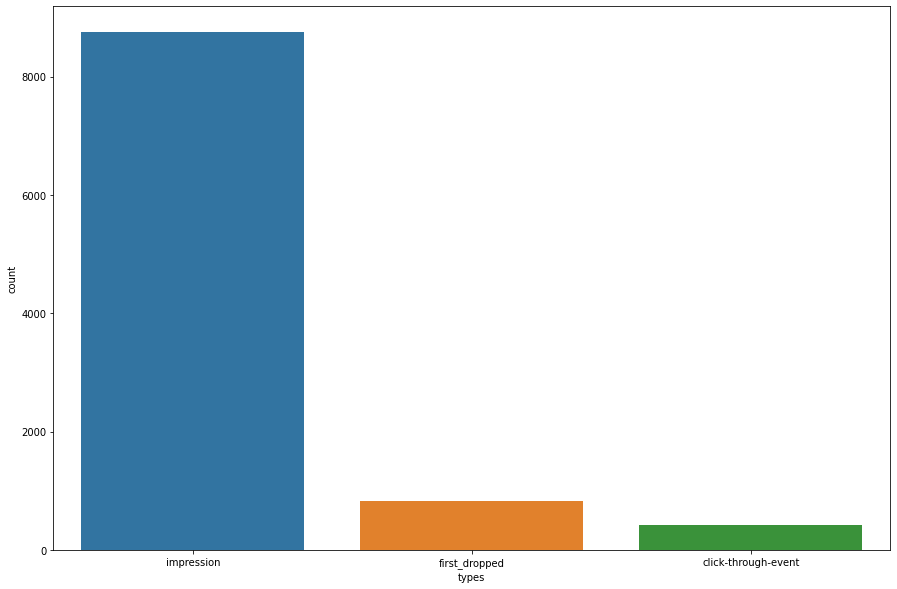

In [58]:
bar_graph(selection1, ["types"], x_ax="types")

ValueError: not enough values to unpack (expected 6, got 3)

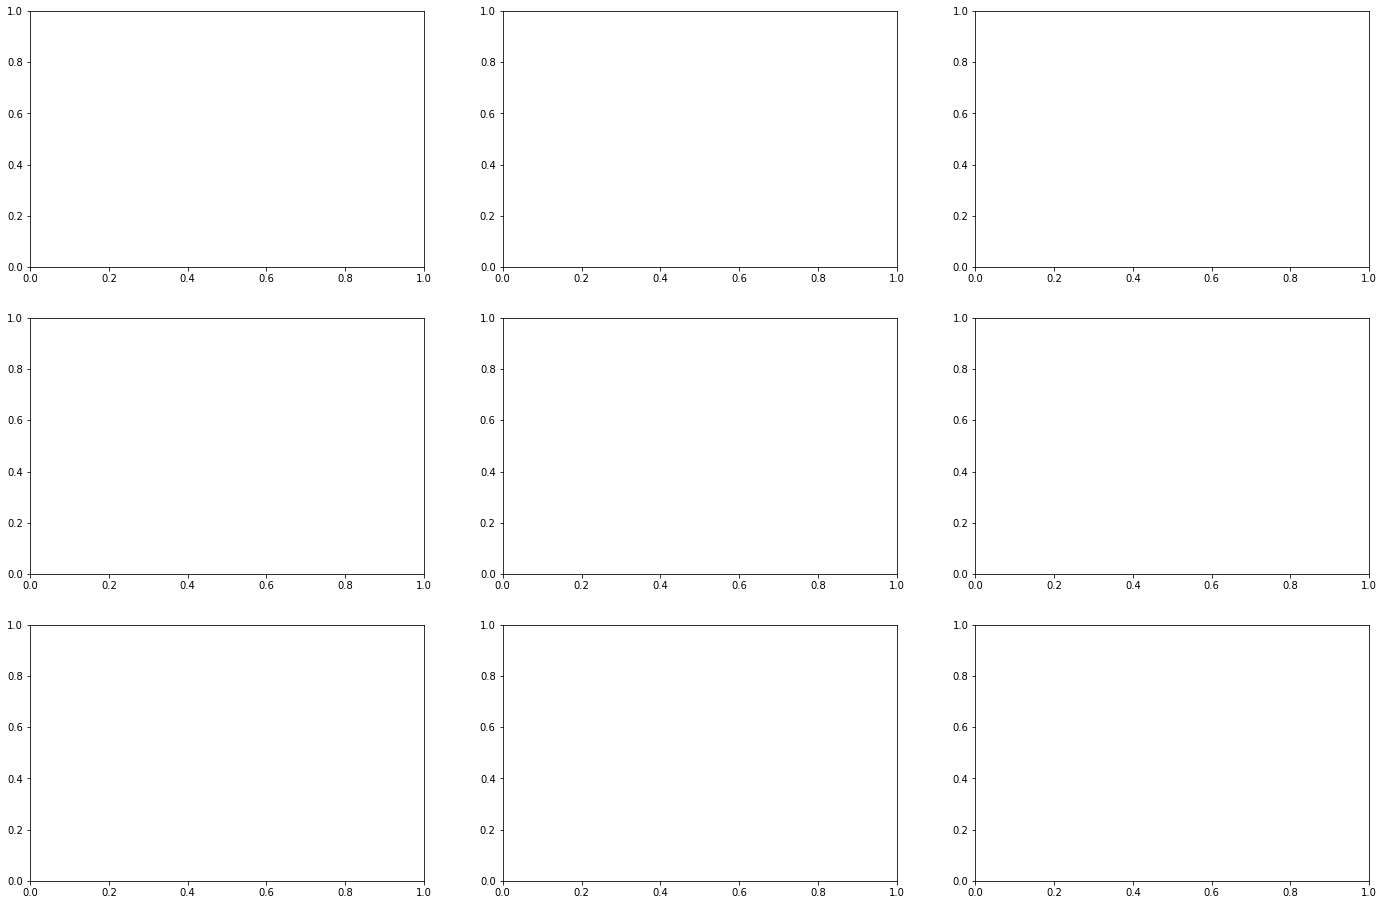

In [64]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) =  plt.subplots(3, 3, sharex=False, sharey= False, figsize=(24,16)) 

type_aggr.plot.bar(grid=True, ax=ax1, x = "types")
plat_aggr.plot.bar(grid=True, ax=ax2, x = "platform_os")
browser_aggr.head(5).plot.bar(grid=True,ax=ax3, x = "browser")